In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_theme(style="whitegrid")#, palette="colorblind")
tol_colors = [
    "#88CCEE", "#332288", "#44AA99", "#117733", "#999933",
    "#DDCC77", "#CC6677", "#882255", "#AA4499", "#DDDDDD"]
import numpy as np
from collections import Counter

In [2]:
with open("results/results_per_user.json", "r") as file:
    stats = json.load(file)
with open("user_study_data/setup_per_user.json", "r") as file:
    setup_per_user = json.load(file)

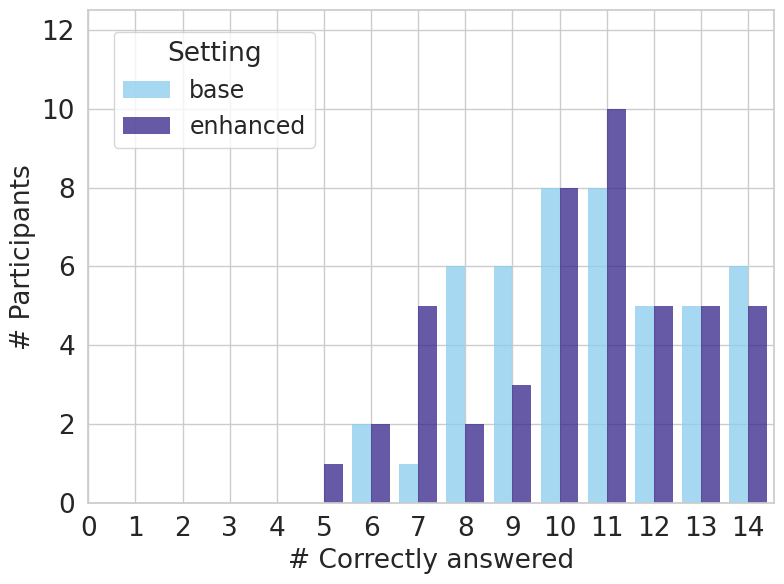

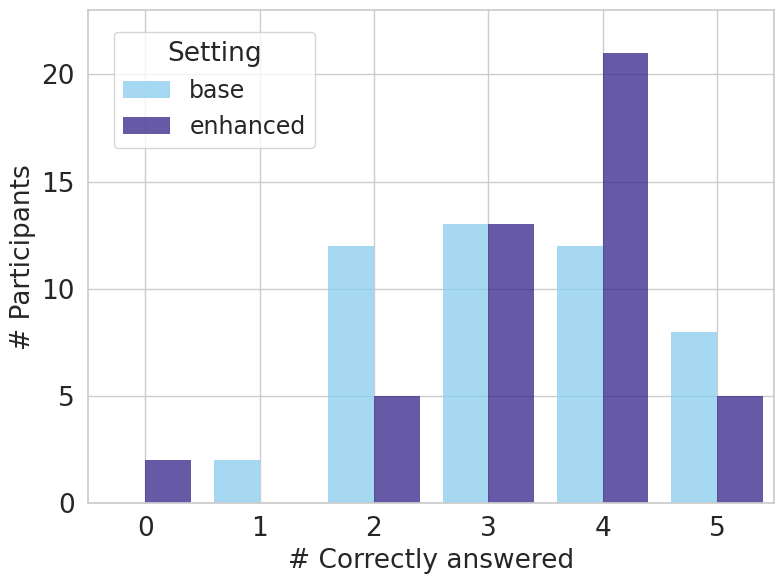

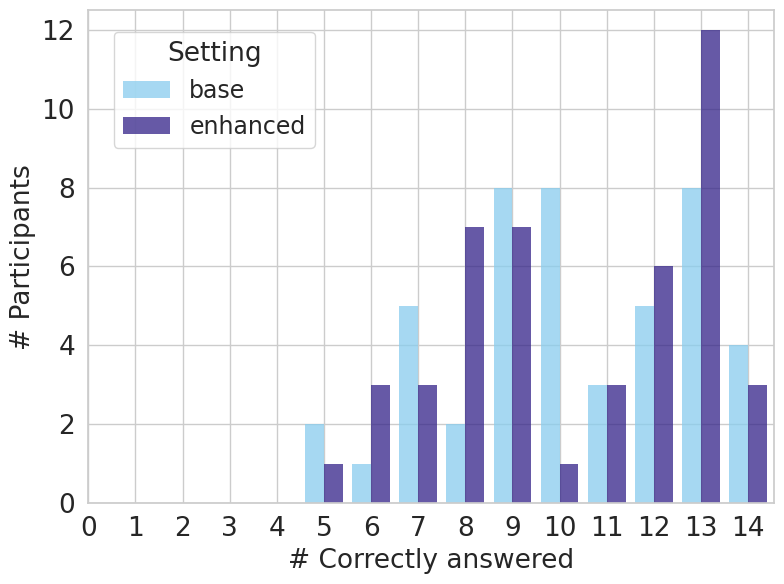

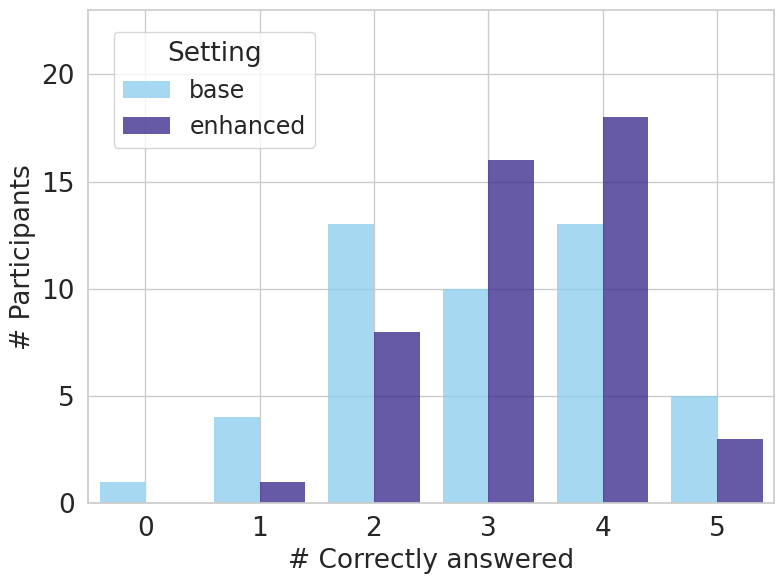

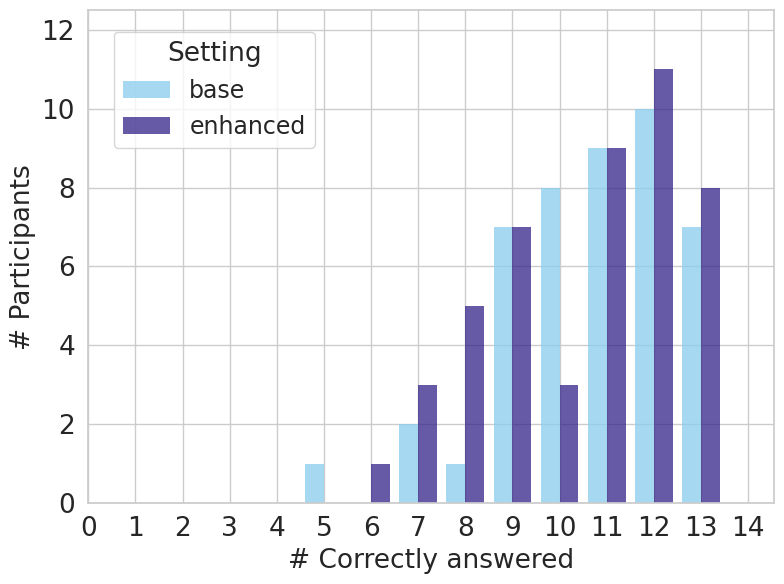

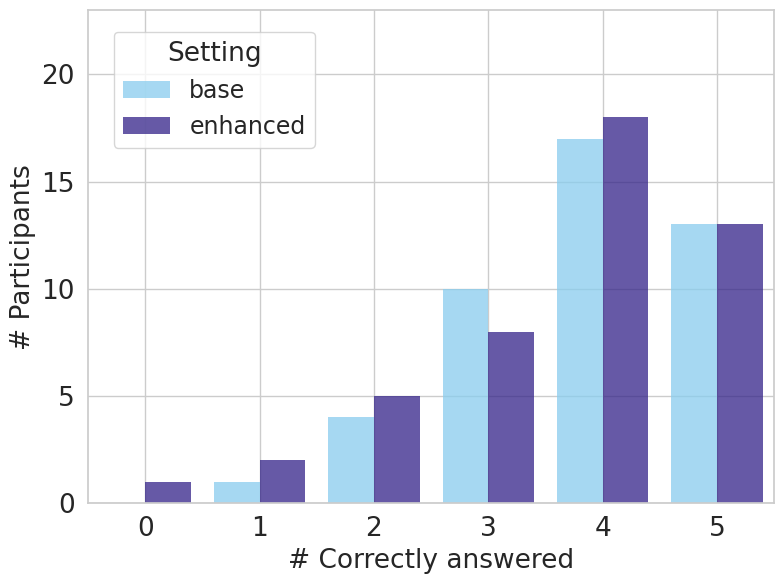

In [5]:
# Objejctive understanding questionnaires
for topic in ["sleep", "quarto", "blackholes"]:
    # Objective comprehension (14 yes/no questions)
    data = []
    for setting in ["base", "enhanced"]:
        for user_id in stats:
            if topic == setup_per_user[user_id]["topic"] and setting == setup_per_user[user_id]["setting"]:
                number_correct_answers = stats[user_id]["post_obj_comprehension"]
                data.append({"Value": number_correct_answers, "Setting": setting})
    
    df = pd.DataFrame(data)

    bin_width = 1
    binrange = (0 - 0.5, 14 + 0.5)  # Shift to center on ticks

    plt.figure(figsize=(8, 6))
    g = sns.histplot(df, x="Value", hue="Setting", multiple="dodge", binrange=binrange, binwidth=bin_width, shrink=0.8, edgecolor="none", palette=tol_colors[:2])
    sns.move_legend(g, "upper left", bbox_to_anchor=(0.02, 0.98), frameon=True, prop={'size': 17}, title_fontsize=19)


    # Add labels and legend
    plt.xlabel('# Correctly answered', fontsize=19)
    plt.ylabel('# Participants', fontsize=19)
    plt.xlim(4.45, 14.55)
    plt.xticks(range(0, 15), fontsize=19)
    plt.yticks(fontsize=19)
    plt.ylim(0, 12.5)
    #plt.title(f"Objective comprehension questionnaire (14 yes/no questions)")
    plt.tight_layout()
    #plt.tick_params(labelsize=14)
    plt.savefig(f'plots/obj_comprehension_histogram_{topic}.pdf', format="pdf")

    # Enabledness (5 multiple choice questions)
    data = []
    for setting in ["base", "enhanced"]:
        for user_id in stats:
            if topic == setup_per_user[user_id]["topic"] and setting == setup_per_user[user_id]["setting"]:
                number_correct_answers = stats[user_id]["post_enabledness"]
                data.append({"Value": number_correct_answers, "Setting": setting})
    
    df = pd.DataFrame(data)

    bin_width = 1
    binrange = (0 - 0.5, 5 + 0.5)  # Shift to center on ticks

    plt.figure(figsize=(8, 6))
    g = sns.histplot(df, x="Value", hue="Setting", multiple="dodge", binrange=binrange, binwidth=bin_width, shrink=0.8, edgecolor="none", palette=tol_colors[:2])
    sns.move_legend(g, "upper left", bbox_to_anchor=(0.02, 0.98), frameon=True, prop={'size': 17}, title_fontsize=19)

    # Add labels and legend
    plt.xlabel('# Correctly answered', fontsize=19)
    plt.ylabel('# Participants', fontsize=19)
    plt.xlim(-0.5, 5.5)
    plt.xticks(range(0, 6), fontsize=19)
    plt.ylim(0, 23)
    plt.yticks(fontsize=19)
    #plt.title(f"Enabledness questionnaire (5 multiple choice questions)")
    plt.tight_layout()
    plt.savefig(f'plots/enabledness_histogram_{topic}.pdf', format="pdf")

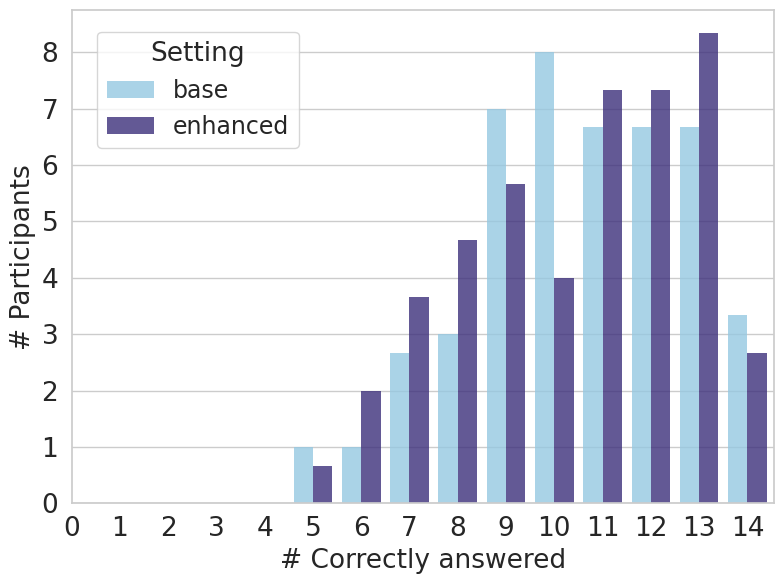

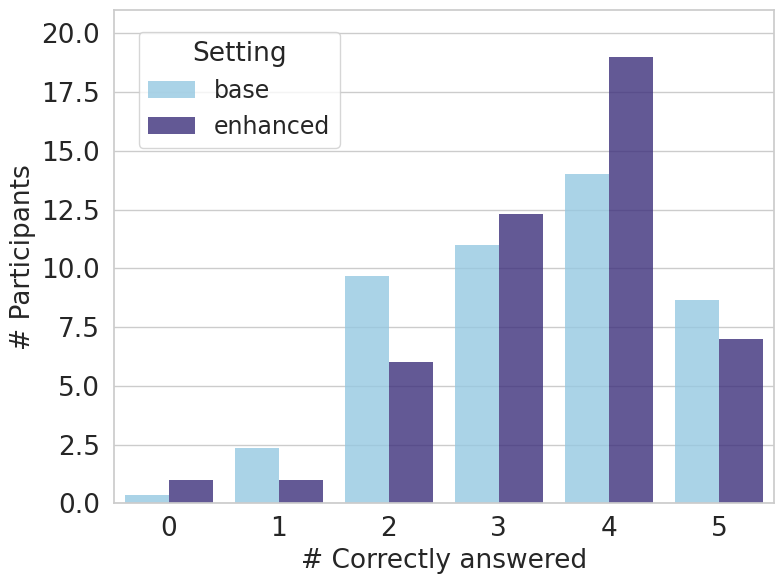

In [7]:
# Objejctive understanding questionnaires
 # Objective comprehension (14 yes/no questions)
data = []
for topic in ["sleep", "quarto", "blackholes"]:
    for setting in ["base", "enhanced"]:
        for user_id in stats:
            if topic == setup_per_user[user_id]["topic"] and setting == setup_per_user[user_id]["setting"]:
                number_correct_answers = stats[user_id]["post_obj_comprehension"]
                data.append({"Topic": topic, "Value": number_correct_answers, "Setting": setting})
    
df = pd.DataFrame(data)

df = df.groupby(["Topic", "Value", "Setting"]).size().reset_index(name="Count")

# Get all unique Values and Settings
all_values = range(0, 14 + 1)
settings = df["Setting"].unique()
topics = df["Topic"].unique()

# Create a full multi-index to ensure all (Value, Setting, Topic) combinations exist
full_index = pd.MultiIndex.from_product([all_values, settings, topics], names=["Value", "Setting", "Topic"])
df = df.set_index(["Value", "Setting", "Topic"]).reindex(full_index, fill_value=0).reset_index()

# Compute mean occurrences over all topics
df_mean = df.groupby(["Value", "Setting"])["Count"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
g = sns.barplot(x="Value", y="Count", hue="Setting", data=df_mean, edgecolor="none",palette=tol_colors[:2], alpha=0.8)
sns.move_legend(g, "upper left", bbox_to_anchor=(0.02, 0.98), frameon=True, prop={'size': 17}, title_fontsize=19)


# Add labels and legend
plt.xlabel('# Correctly answered', fontsize=19)
plt.ylabel('# Participants', fontsize=19)
plt.xlim(4.45, 14.55)
plt.xticks(range(0, 15), fontsize=19)
plt.yticks(fontsize=19)
#plt.title(f"Objective comprehension questionnaire (14 yes/no questions)")
plt.tight_layout()
#plt.tick_params(labelsize=14)
#plt.savefig(f'plots/obj_comprehension_histogram.png', dpi=1000)
plt.savefig(f'plots/obj_comprehension_histogram.pdf', format="pdf")

# Enabledness (5 multiple choice questions)
data = []
for topic in ["sleep", "quarto", "blackholes"]:
    for setting in ["base", "enhanced"]:
        for user_id in stats:
            if topic == setup_per_user[user_id]["topic"] and setting == setup_per_user[user_id]["setting"]:
                number_correct_answers = stats[user_id]["post_enabledness"]
                data.append({"Topic": topic, "Value": number_correct_answers, "Setting": setting})
    
df = pd.DataFrame(data)

df = df.groupby(["Topic", "Value", "Setting"]).size().reset_index(name="Count")

# Get all unique Values and Settings
all_values = range(0, 5 + 1)
settings = df["Setting"].unique()
topics = df["Topic"].unique()

# Create a full multi-index to ensure all (Value, Setting, Topic) combinations exist
full_index = pd.MultiIndex.from_product([all_values, settings, topics], names=["Value", "Setting", "Topic"])
df = df.set_index(["Value", "Setting", "Topic"]).reindex(full_index, fill_value=0).reset_index()

# Compute mean occurrences over all topics
df_mean = df.groupby(["Value", "Setting"])["Count"].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
g = sns.barplot(x="Value", y="Count", hue="Setting", data=df_mean, edgecolor="none",palette=tol_colors[:2],alpha=0.8)
sns.move_legend(g, "upper left", bbox_to_anchor=(0.02, 0.98), frameon=True, prop={'size': 17}, title_fontsize=19)

# Add labels and legend
plt.xlabel('# Correctly answered', fontsize=19)
plt.ylabel('# Participants', fontsize=19)
plt.xticks(range(0, 6), fontsize=19)
plt.ylim(0, 21)
plt.yticks(fontsize=19)
#plt.title(f"Enabledness questionnaire (5 multiple choice questions)")
plt.tight_layout()
#plt.savefig(f'plots/enabledness_histogram.png', dpi=1000)
plt.savefig(f'plots/enabledness_histogram.pdf', format="pdf")